<a href="https://colab.research.google.com/github/KwonYN/TIL/blob/master/PYTHON/TENSORFLOW2/04_04_gan_dcgan_mnist_load_7_kyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **실습 4-4 : DCGAN with MNIST** 

## **Import Module**

In [0]:
%tensorflow_version 1.x


In [0]:
import tensorflow as tf

import tensorflow.keras as keras
from tensorflow.keras.models import Sequential,Model,load_model
from tensorflow.keras.layers import Input,Dense,Reshape
from tensorflow.keras.layers import ReLU,LeakyReLU,Dropout,Flatten
from tensorflow.keras.layers import Conv2DTranspose,Conv2D,BatchNormalization
from tensorflow.keras.datasets import mnist

import numpy as np


## **DataSet**

### Load

In [0]:
# X_train만 사용
(X_train, _), (_, _) = mnist.load_data() 

### Preprocessing

In [0]:
# Generator의 마지막 활성화 함수를 'tanh(.)'를 사용했기 때문에, (-1 ~ 1) 로 스케일링 해준다.
X_train = X_train.astype(np.float32) / 127.5 - 1 
X_train = np.expand_dims(X_train, axis=-1) #(28,28,1)

## Load model

In [0]:
# gdrive mount
from google.colab import drive
drive.mount('/content/drive')

save_path = '/content/drive/Shared drives/scsa_2019_c/07_kyn/models/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
def load_models(title, epoch):
  gen = load_model(save_path+"dcgan_generator_{}_{}.hdf5".format(title, epoch))
  dis = load_model(save_path+"dcgan_discriminator_{}_{}.hdf5".format(title, epoch))
  g = load_model(save_path+"dcgan_combined_{}_{}.hdf5".format(title, epoch))
  return gen, dis, g


### load dc gan mnist and show the result

In [0]:
latent_dim = 100

In [0]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")

def show_images(generated_images, n=4, m=8, figsize=(9, 5)):
    fig = plt.figure(figsize=figsize)
    plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
    for i in range(n):
        for j in range(m):
            k = i * m + j
            ax = fig.add_subplot(n, m, i * m + j + 1)
            ax.imshow(generated_images[k][:, :, 0])#, cmap=plt.cm.bone)
            ax.grid(False)
            ax.xaxis.set_ticks([])
            ax.yaxis.set_ticks([])
    plt.tight_layout()
    plt.show()


noise_data = np.random.normal(0, 1, size=(32, latent_dim))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


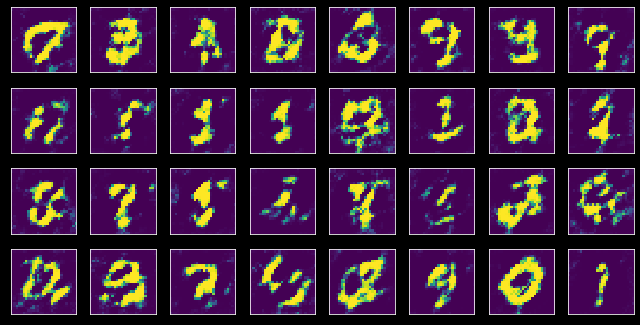

In [0]:
generator, _, _ = load_models("mnist",500)
show_images(0.5 * generator.predict(noise_data) + 0.5)

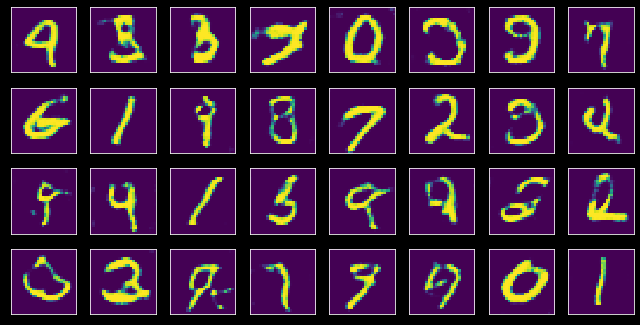

In [0]:
generator, _, _ = load_models("mnist",4500)
show_images(0.5 * generator.predict(noise_data) + 0.5)

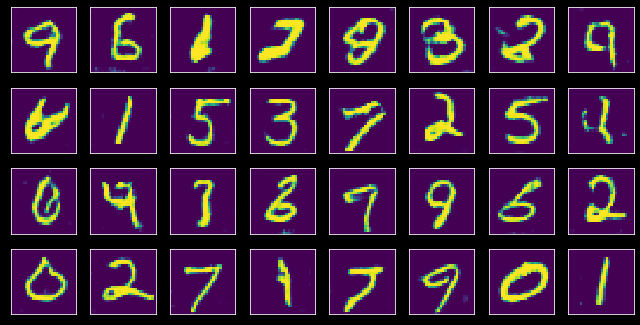

In [0]:
generator, _, _ = load_models("mnist",15000)
show_images(0.5 * generator.predict(noise_data) + 0.5)

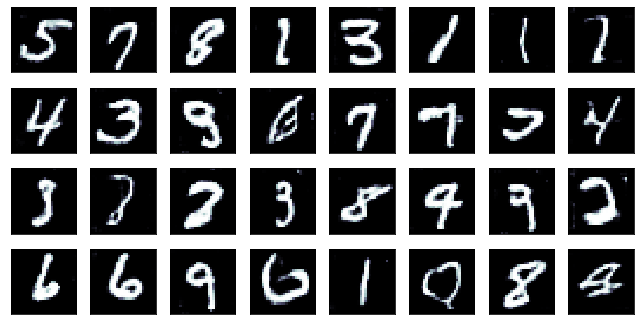